In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreads-books-reviews-290312/goodreads_test.csv
/kaggle/input/goodreads-books-reviews-290312/goodreads_sample_submission.csv
/kaggle/input/goodreads-books-reviews-290312/goodreads_train.csv


In [2]:
import pandas as pd
import csv
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
train = pd.read_csv("/kaggle/input/goodreads-books-reviews-290312/goodreads_train.csv")
test = pd.read_csv("/kaggle/input/goodreads-books-reviews-290312/goodreads_test.csv")

In [4]:
train0=train[train['rating']==0]
train1=train[train['rating']==1]
train2=train[train['rating']==2]
train3=train[train['rating']==3]
train4=train[train['rating']==4]
train5=train[train['rating']==5]

In [5]:
train0.shape, train1.shape, train2.shape, train3.shape, train4.shape, train5.shape

((30988, 11),
 (28718, 11),
 (72627, 11),
 (188972, 11),
 (313688, 11),
 (265007, 11))

In [6]:
train0=train0[:int(train0.shape[0]/100)]
train1=train1[:int(train1.shape[0]/100)]
train2=train2[:int(train2.shape[0]/100)]
train3=train3[:int(train3.shape[0]/100)]
train4=train4[:int(train4.shape[0]/100)]
train5=train5[:int(train5.shape[0]/100)]

In [7]:
train0.shape, train1.shape, train2.shape, train3.shape, train4.shape, train5.shape

((309, 11), (287, 11), (726, 11), (1889, 11), (3136, 11), (2650, 11))

In [8]:
train=pd.concat([train0,train1,train2,train3,train4,train5],axis=0)

In [9]:
train.shape

(8997, 11)

In [10]:
train.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')

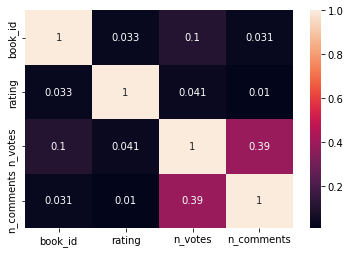

In [11]:
import seaborn as sns

#plotting the heatmap for correlation
ax = sns.heatmap(train.corr(), annot=True)

In [12]:
train = train.drop(['user_id', 'book_id', 'review_id', 'date_added', 'date_updated', 'n_votes','read_at', 'started_at','n_comments'], axis = 1)

In [13]:
train

,rating,review_text
3,0,Recommended reading to understand what is goin...
7,0,Numerous people in publishing have told me thi...
13,0,Recommended by David Risher
54,0,"Well if Melanie says its her BBE, I gotta chec..."
58,0,"If steve recommends it, it must be good!"
...,...,...
8008,5,Loose ends are tied up and old mysteries are s...
8013,5,This was my most recent audio book. The narrat...
8022,5,Harold Fry receives a letter in the mail from ...
8028,5,"August was born with several problems, includi..."


In [14]:
test.columns


Index(['user_id', 'book_id', 'review_id', 'review_text', 'date_added',
       'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments'],
      dtype='object')

In [15]:
test = test.drop(['user_id', 'book_id', 'review_id', 'date_added','date_updated', 'read_at', 'started_at','n_comments'], axis = 1)

In [16]:
test

,review_text,n_votes
0,** spoiler alert ** \n This is definitely one ...,1
1,"** spoiler alert ** \n ""You are what you drink...",1
2,Roar is one of my favorite characters in Under...,0
3,** spoiler alert ** \n If you feel like travel...,0
4,3.5 stars \n I read and enjoyed the first two ...,0
...,...,...
478028,Can't wait for Travis' POV \n Travis Before Ab...,0
478029,Had this on my to-read shelf forever. Will upd...,0
478030,The last book left me wanting for more. I need...,0
478031,Things are heating up in the second novel of I...,0


In [17]:
#Remove Hashtags
train['review_text'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

#Remove Mention
train['review_text'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

#Remove URL
train['review_text'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

train['review_text']=train['review_text'].str.lower()

In [18]:
#Remove Hashtags
test['review_text'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

#Remove Mention
test['review_text'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

#Remove URL
test['review_text'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

test['review_text'] = test['review_text'].str.lower()

In [19]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [20]:
train['review_text'] = train['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

test['review_text'] = test['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [21]:
train.head()

,rating,review_text
3,0,recommended reading understand going middle am...
7,0,numerous people publishing told book year.
13,0,recommended david risher
54,0,"well melanie says bbe, gotta check out..."
58,0,"steve recommends it, must good!"


In [22]:
test.head()

,review_text,n_votes
0,** spoiler alert ** definitely one favorites a...,1
1,"** spoiler alert ** ""you drink."" i'm huge fan ...",1
2,roar one favorite characters never sky i'm hap...,0
3,** spoiler alert ** feel like travelling europ...,0
4,3.5 stars read enjoyed first two novels series...,0


In [23]:
train.shape

(8997, 2)

In [24]:
test.shape

(478033, 2)

In [25]:
train['rating'].value_counts()

4    3136
5    2650
3    1889
2     726
0     309
1     287
Name: rating, dtype: int64

In [26]:
X_temp, X_test, y_temp, y_test = train_test_split(train, list(train.rating), test_size=0.2, random_state=0)

In [27]:
X_temp['rating'] = y_temp

In [28]:
X_temp.head()

,rating,review_text
8590,0,"sounds terrible, sign"
7056,4,new turn events quite unexpected.
9579,1,i'll repeat fountainhead review here..... used...
7071,5,still wonderful remember.
8160,2,short predictable read woman escapes abusive h...


In [29]:
zero = X_temp[X_temp['rating'] == 0]
zero.shape[0]

240

In [30]:
one = X_temp[X_temp['rating'] == 1]
one.shape[0]

231

In [31]:
two = X_temp[X_temp['rating'] == 2]
two.shape[0]

586

In [32]:
three = X_temp[X_temp['rating'] == 3]
three.shape[0]

1521

In [33]:
four = X_temp[X_temp['rating'] == 4]
four.shape[0]

2507

In [34]:
five = X_temp[X_temp['rating'] == 5]
five.shape[0]

2112

In [35]:
ds = pd.concat([zero,one,two,three,four,five], axis = 0)
ds

,rating,review_text
8590,0,"sounds terrible, sign"
12984,0,"2016 decent far reading went. stinker there, t..."
1024,0,"took little book hit stride, really took off. ..."
4945,0,"julie kagawa, know writing magic here... writi..."
9092,0,"idea why, synopsis reminds gallagher girls ser..."
...,...,...
4566,5,uncensored conversation goodreads miriam: full...
1520,5,4.5 stars! vanya petrov survived targeted atta...
4308,5,ok understand hype behind series novella parti...
915,5,"whew, ride. really enjoyed book much first. re..."


In [36]:
testdf = X_test
testdf['rating'] = y_test
testdf.shape

(1800, 2)

In [37]:
ds = pd.concat([ds, testdf], axis = 0)

In [38]:
ds[ds['rating']==0].shape, ds[ds['rating']==1].shape, ds[ds['rating']==2].shape, ds[ds['rating']==3].shape, ds[ds['rating']==4].shape, ds[ds['rating']==5].shape

((309, 2), (287, 2), (726, 2), (1889, 2), (3136, 2), (2650, 2))

In [39]:
corpus = []
for i in range(ds.shape[0]):
    corpus.append(ds.iloc[i][0])

In [40]:
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(ds['review_text'])
feature_names1 = vectorizer1.get_feature_names()
denselist1 = X1.todense().tolist()
df2_train = pd.DataFrame(denselist1, columns=feature_names1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
tdf = df2_train
tdf['labelxyz'] = list(ds.rating)

In [42]:
tdf_zero = tdf[tdf.labelxyz == 0]
tdf_zero.shape

tdf_one = tdf[tdf.labelxyz == 1]
tdf_one.shape

tdf_two = tdf[tdf.labelxyz == 2]
tdf_two.shape

tdf_three = tdf[tdf.labelxyz == 3]
tdf_three.shape

tdf_four = tdf[tdf.labelxyz == 4]
tdf_four.shape

tdf_five = tdf[tdf.labelxyz == 5]
tdf_five.shape

(2650, 1001)

In [43]:
X_train_zero = tdf_zero.sample(frac=0.9, random_state=0)
X_test_zero = tdf_zero.drop(X_train_zero.index)

In [44]:
X_train_one = tdf_zero.sample(frac=0.9, random_state=0)
X_test_one = tdf_zero.drop(X_train_one.index)

In [45]:
X_train_two = tdf_two.sample(frac=0.9, random_state=0)
X_test_two = tdf_two.drop(X_train_two.index)

In [46]:
X_train_three = tdf_three.sample(frac=0.9, random_state=0)
X_test_three = tdf_three.drop(X_train_three.index)

In [47]:
X_train_four = tdf_four.sample(frac=0.9, random_state=0)
X_test_four = tdf_four.drop(X_train_four.index)

In [48]:
X_train_five = tdf_five.sample(frac=0.9, random_state=0)
X_test_five = tdf_five.drop(X_train_five.index)

In [49]:
X_train_df = pd.concat([X_train_zero,X_train_one,X_train_two, X_train_three, X_train_four, X_train_five], axis = 0)
tfdf_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_zero,X_test_one,X_test_two, X_test_three, X_test_four, X_test_five], axis = 0)
tfdf_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)


In [50]:
accuracy = {'TF-IDF':[],'BOW':[]}

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

# Logistic Regression

In [52]:
len(tfdf_train), len(y_train)

(8116, 8116)

In [53]:
len(tfdf_test), len(y_test)

(903, 903)

In [54]:
#TF-IDF
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(tfdf_train,y_train)
y_predict_LR_tf = regressor_LR_tf.predict(tfdf_test)
a=(regressor_LR_tf.score(tfdf_test,y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_LR_tf))
print(metrics.classification_report(y_test, y_predict_LR_tf))
print(metrics.accuracy_score(y_test, y_predict_LR_tf))

[[ 18   2   8  14  20]
 [  3  11  30  14  15]
 [  3  10  70  79  27]
 [  3   0  38 192  81]
 [  2   1  20  74 168]]
              precision    recall  f1-score   support

           0       0.62      0.29      0.40        62
           2       0.46      0.15      0.23        73
           3       0.42      0.37      0.39       189
           4       0.51      0.61      0.56       314
           5       0.54      0.63      0.58       265

    accuracy                           0.51       903
   macro avg       0.51      0.41      0.43       903
weighted avg       0.51      0.51      0.49       903

0.5083056478405316


# Decision Tree

In [55]:
#TF-IDF
model_DT_tf = DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_tf.fit(tfdf_train,y_train)
y_predict_DT_tf = model_DT_tf.predict(tfdf_test)
a=(model_DT_tf.score(tfdf_test,y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_DT_tf))
print(metrics.classification_report(y_test, y_predict_DT_tf))
print(metrics.accuracy_score(y_test, y_predict_DT_tf))

[[  0   0   0  56   6]
 [  0   0   0  67   6]
 [  0   0   0 153  36]
 [  0   0   0 209 105]
 [  0   0   0 139 126]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           2       0.00      0.00      0.00        73
           3       0.00      0.00      0.00       189
           4       0.33      0.67      0.45       314
           5       0.45      0.48      0.46       265

    accuracy                           0.37       903
   macro avg       0.16      0.23      0.18       903
weighted avg       0.25      0.37      0.29       903

0.3709856035437431


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting

In [56]:
#TF-IDF
model_GB_tf = GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, n_estimators= 100,subsample=1.0) 
model_GB_tf.fit(tfdf_train,y_train)
y_predict_GB_tf = model_GB_tf.predict(tfdf_test)
a=(model_GB_tf.score(tfdf_test,y_test))
accuracy['TF-IDF'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_GB_tf))
print(metrics.classification_report(y_test, y_predict_GB_tf))
print(metrics.accuracy_score(y_test, y_predict_GB_tf))

[[ 16   2   4  26  14]
 [  1   8  14  36  14]
 [  1   2  60 104  22]
 [  0   2  19 215  78]
 [  0   1   4 101 159]]
              precision    recall  f1-score   support

           0       0.89      0.26      0.40        62
           2       0.53      0.11      0.18        73
           3       0.59      0.32      0.41       189
           4       0.45      0.68      0.54       314
           5       0.55      0.60      0.58       265

    accuracy                           0.51       903
   macro avg       0.60      0.39      0.42       903
weighted avg       0.55      0.51      0.49       903

0.5071982281284607


# Random Forest

In [57]:
#TF-IDF
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(tfdf_train,y_train)
y_predict_RF_tf = model_RF_tf.predict(tfdf_test)
a=(model_RF_tf.score(tfdf_test,y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_RF_tf))
print(metrics.classification_report(y_test, y_predict_RF_tf))
print(metrics.accuracy_score(y_test, y_predict_RF_tf))

[[ 16   0   2  20  24]
 [  1   2  17  30  23]
 [  2   1  32 120  34]
 [  1   0  23 218  72]
 [  0   0  12  97 156]]
              precision    recall  f1-score   support

           0       0.80      0.26      0.39        62
           2       0.67      0.03      0.05        73
           3       0.37      0.17      0.23       189
           4       0.45      0.69      0.55       314
           5       0.50      0.59      0.54       265

    accuracy                           0.47       903
   macro avg       0.56      0.35      0.35       903
weighted avg       0.49      0.47      0.43       903

0.4695459579180509


# K Nearest Neighbours

In [58]:
#TF-IDF
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(tfdf_train,y_train)
y_predict_KN_tf = model_KN_tf.predict(tfdf_test)
a=(model_KN_tf.score(tfdf_test,y_test))
accuracy['TF-IDF'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_KN_tf))
print(metrics.classification_report(y_test, y_predict_KN_tf))
print(metrics.accuracy_score(y_test, y_predict_KN_tf))

[[ 10  20  14  12   6]
 [  8  14  15  30   6]
 [ 14  43  45  73  14]
 [ 18  77  66 132  21]
 [ 15  64  61  95  30]]
              precision    recall  f1-score   support

           0       0.15      0.16      0.16        62
           2       0.06      0.19      0.10        73
           3       0.22      0.24      0.23       189
           4       0.39      0.42      0.40       314
           5       0.39      0.11      0.18       265

    accuracy                           0.26       903
   macro avg       0.24      0.22      0.21       903
weighted avg       0.31      0.26      0.26       903

0.2558139534883721


In [59]:
model = ['LR','DT','GB','RF','KN']
data = {'model':model,'accuracy':accuracy['TF-IDF']}
compare_models = pd.DataFrame(data)
compare_models

,model,accuracy
0,LR,0.508306
1,DT,0.370986
2,GB,0.507198
3,RF,0.469546
4,KN,0.255814


# RNN

In [60]:
import pandas as pd
from nltk import word_tokenize

data = train['review_text'].map(word_tokenize).values
total_vocabulary = set(word.lower() for tweet in data for word in tweet)  # set created from nested comprehension 
print('There are {} unique words in the dataset.'.format(len(total_vocabulary)))
print('There are {} unique tweets in the dataset.'.format(len(data)))


train.head()

There are 41591 unique words in the dataset.
There are 8997 unique tweets in the dataset.


,rating,review_text
3,0,recommended reading understand going middle am...
7,0,numerous people publishing told book year.
13,0,recommended david risher
54,0,"well melanie says bbe, gotta check out..."
58,0,"steve recommends it, must good!"


In [61]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

# set the emotion/sentiment as our target
target = train['rating']

# use one hot encoding since our target is categorical
y = pd.get_dummies(target).values

# use keras to create a Tokenizer object
tokenizer = text.Tokenizer(num_words=20000)  # limit to the num_words most important ones
tokenizer.fit_on_texts(list(train['review_text']))
tokenized_texts = tokenizer.texts_to_sequences(train['review_text'])
X = sequence.pad_sequences(tokenized_texts, maxlen=100)

In [62]:
X.shape

(8997, 100)

In [63]:
y.shape

(8997, 6)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
y_test

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

In [66]:
# create my NN model
model = Sequential()

embedding_size = 128
model.add(Embedding(len(total_vocabulary), embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax')) 

2023-01-07 16:52:13.300212: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [67]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary() # check the shape

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         5323648   
_________________________________________________________________
lstm (LSTM)                  (None, None, 25)          15400     
_________________________________________________________________
global_max_pooling1d (Global (None, 25)                0         
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                1300      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2

In [68]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10


2023-01-07 16:52:13.915258: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


203/203 [==============================] - 29s 124ms/step - loss: 1.5494 - accuracy: 0.3191 - val_loss: 1.4621 - val_accuracy: 0.3375
Epoch 2/10
203/203 [==============================] - 25s 122ms/step - loss: 1.3934 - accuracy: 0.3477 - val_loss: 1.3932 - val_accuracy: 0.3722
Epoch 3/10
203/203 [==============================] - 24s 119ms/step - loss: 1.2600 - accuracy: 0.4040 - val_loss: 1.3985 - val_accuracy: 0.4014
Epoch 4/10
203/203 [==============================] - 25s 122ms/step - loss: 1.1314 - accuracy: 0.4604 - val_loss: 1.5017 - val_accuracy: 0.4056
Epoch 5/10
203/203 [==============================] - 25s 121ms/step - loss: 1.0565 - accuracy: 0.4887 - val_loss: 1.7082 - val_accuracy: 0.4069
Epoch 6/10
203/203 [==============================] - 25s 121ms/step - loss: 0.9667 - accuracy: 0.5157 - val_loss: 1.8120 - val_accuracy: 0.3833
Epoch 7/10
203/203 [==============================] - 24s 120ms/step - loss: 0.9095 - accuracy: 0.5283 - val_loss: 1.9625 - val_accuracy: 0.3

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred=model.predict(X_test) 

In [70]:
y_pred_1 =  np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
print(y_pred_1)
y_test

[3 5 4 ... 4 4 3]


array([5, 5, 5, ..., 0, 5, 3])

In [71]:
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

accuracy_score(y_test, y_pred_1)

[[  3   0  25  12  20   4]
 [  0   0  20  16  10   2]
 [  1   0  42  84  30  11]
 [  2   0  29 190 112  50]
 [  0   0  13 140 234 245]
 [  2   0  11  55 146 291]]


0.4222222222222222

In [72]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


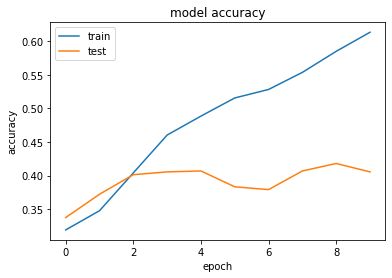

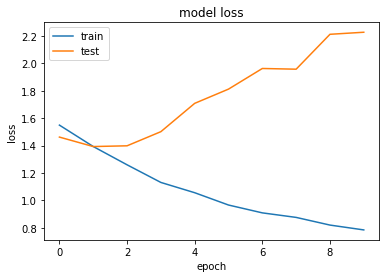

In [73]:
# Visualize training history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()